# Plant disease classifier

## Importing libraries

In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Model

### Importing convolutional base

In [2]:
conv_base = tf.keras.applications.MobileNet(
    include_top= False, 
    weights= 'imagenet', 
    input_shape= (224, 224, 3)
)

In [3]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

### Combined model

In [4]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(38, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________


## Preparing data

In [5]:
base_dir = 'Plant Diseases Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')

train_datagen = ImageDataGenerator(rescale= 1/.255)
val_datagen = ImageDataGenerator(rescale= 1/.255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (224, 224), 
    batch_size= 64, 
    class_mode= 'categorical')
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size= (224, 224), 
    batch_size= 32, 
    class_mode= 'categorical')

model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


## Training and results

In [6]:
history = model.fit(train_generator, steps_per_epoch= 70295/64, epochs= 10, validation_data= validation_generator, validation_steps= 17572/32)

Epoch 1/10
1099/1098 [==============================] - 848s 772ms/step - loss: 1.1154 - accuracy: 0.7035 - val_loss: 0.6937 - val_accuracy: 0.8024
Epoch 2/10
1099/1098 [==============================] - 394s 358ms/step - loss: 0.5886 - accuracy: 0.8307 - val_loss: 0.5472 - val_accuracy: 0.8419
Epoch 3/10
1099/1098 [==============================] - 263s 240ms/step - loss: 0.4794 - accuracy: 0.8606 - val_loss: 0.4966 - val_accuracy: 0.8511
Epoch 4/10
1099/1098 [==============================] - 264s 240ms/step - loss: 0.4197 - accuracy: 0.8760 - val_loss: 0.4502 - val_accuracy: 0.8652
Epoch 5/10
1099/1098 [==============================] - 265s 241ms/step - loss: 0.3799 - accuracy: 0.8856 - val_loss: 0.4412 - val_accuracy: 0.8646
Epoch 6/10
1099/1098 [==============================] - 264s 240ms/step - loss: 0.3516 - accuracy: 0.8946 - val_loss: 0.4083 - val_accuracy: 0.8762
Epoch 7/10
1099/1098 [==============================] - 264s 241ms/step - loss: 0.3269 - accuracy: 0.9013 - val_

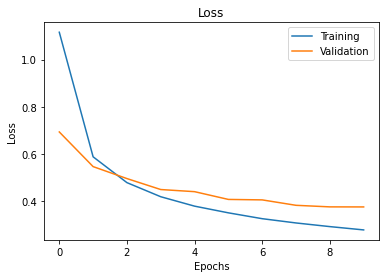

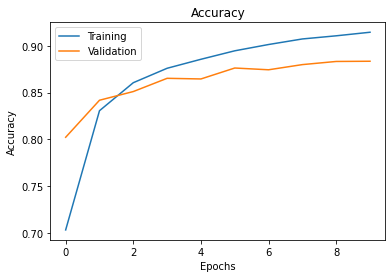

In [10]:
plt.figure('Loss')
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.figure('Accuracy')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

In [11]:
# Model saving
model.save('trained_model_mobilenet.h5')

In [14]:
loader = tf.keras.models.load_model('trained_model_mobilenet.h5')
loader.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________
